In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:

file_path = "/amz&walmart/walmart.csv"

df = pd.read_csv(file_path)

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [13]:
df.describe().round()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,550068.0,550068.0,550068.0,550068.0,550068.0
mean,1003029.0,8.0,0.0,5.0,9264.0
std,1728.0,7.0,0.0,4.0,5023.0
min,1000001.0,0.0,0.0,1.0,12.0
25%,1001516.0,2.0,0.0,1.0,5823.0
50%,1003077.0,7.0,0.0,5.0,8047.0
75%,1004478.0,14.0,1.0,8.0,12054.0
max,1006040.0,20.0,1.0,20.0,23961.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [15]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

(array([0, 1, 2]), [Text(0, 0, 'A'), Text(1, 0, 'C'), Text(2, 0, 'B')])

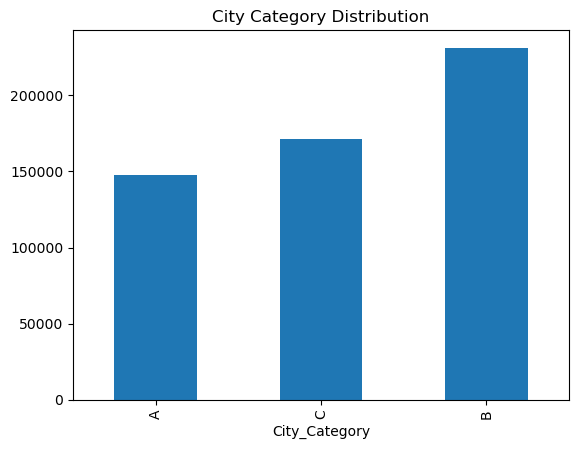

In [16]:
df_city_dist = df['City_Category'].value_counts().sort_values().plot(kind='bar', title='City Category Distribution')
df_city_dist
plt.xticks()

<Axes: title={'center': 'Occupation Distribution'}, xlabel='Occupation'>

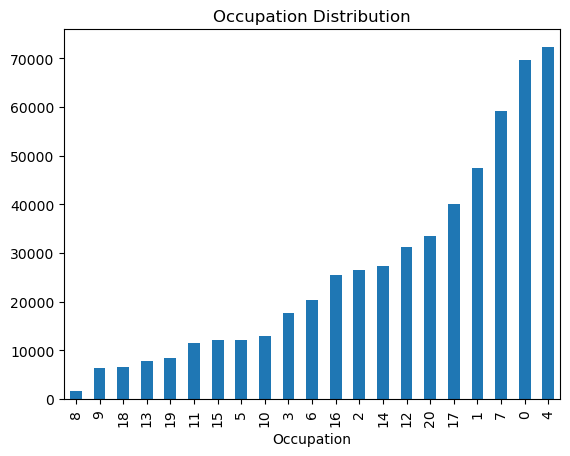

In [17]:
df_ocupation_dist = df['Occupation'].value_counts().sort_values().plot(kind='bar', title='Occupation Distribution')
df_ocupation_dist

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_77112/3361300623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender',y='Count', data= df_gender_dist, palette=walmart_palette)


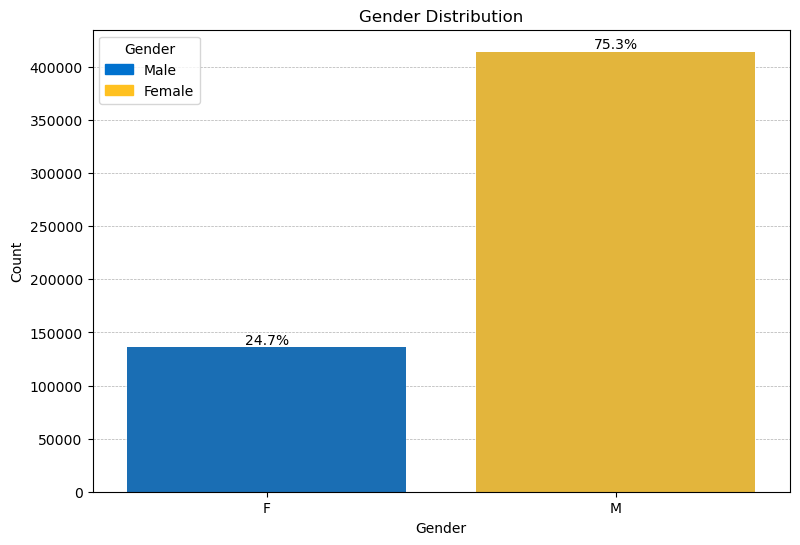

In [18]:
walmart_palette = ['#0071ce', '#ffc120']
df_gender_dist = df.groupby('Gender').size().reset_index(name='Count')
plt.figure(figsize=(9, 6))
plt.grid(True,axis='y',linestyle='--',linewidth=0.5)
plt.title('Gender Distribution')
ax = sns.barplot(x='Gender',y='Count', data= df_gender_dist, palette=walmart_palette)
ax.set_axisbelow(True)
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in walmart_palette]
ax.legend(handles, ['Male', 'Female'], title='Gender')
total = df_gender_dist['Count'].sum()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom')


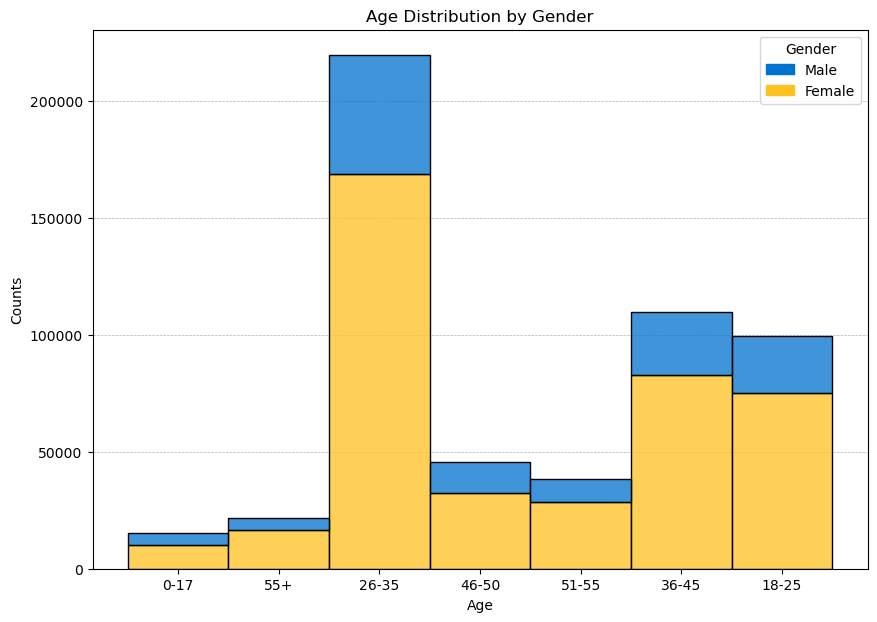

In [19]:
age_order = df.copy()['Age'].unique()
age_order.astype(str).sort()

plt.figure(figsize=(10, 7))
ax = sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', palette=walmart_palette)
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in walmart_palette]
ax.legend(handles, ['Male', 'Female'], title='Gender')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Counts')

plt.show()

In [20]:
df_income_distribution = df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


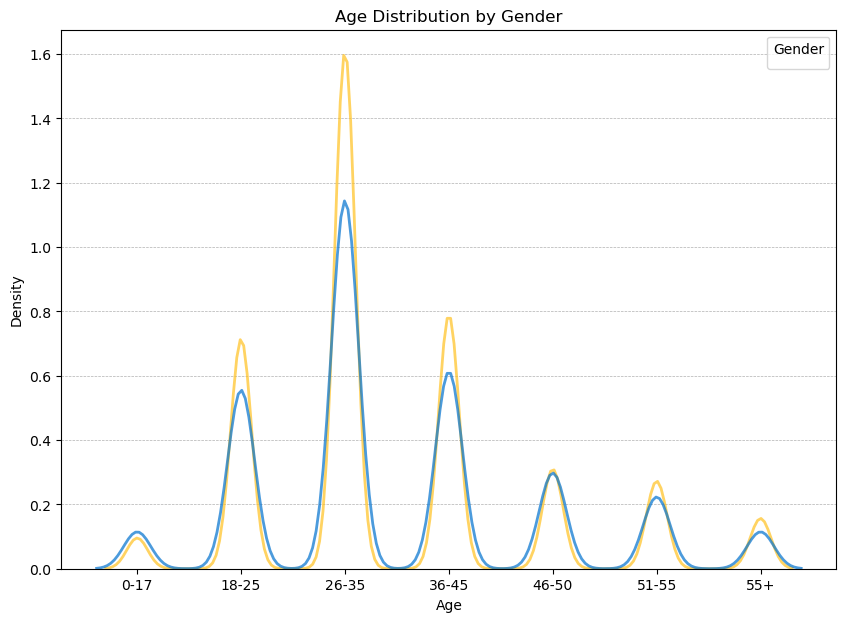

In [21]:
# Copy and prepare the data
df_age_gender = df.copy()
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Convert Age to a categorical type with a specified order
df_age_gender['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
df_age_gender['Age_code'] = df_age_gender['Age'].cat.codes


# Plot the KDE plot
plt.figure(figsize=(10, 7))
ax = sns.kdeplot(data=df_age_gender, x='Age_code', hue='Gender', palette=walmart_palette, lw=2, common_norm=False, alpha=0.7)

# Add grid and other plot adjustments
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
plt.xticks(ticks=range(len(age_order)), labels=age_order)
ax.set_axisbelow(True)

# Automatically generate the legend based on hue
ax.legend(title='Gender')

# Set titles and labels
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')

# Display the plot
plt.show()

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_77112/2254534405.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.countplot(data=df,x='Age',palette="rocket")


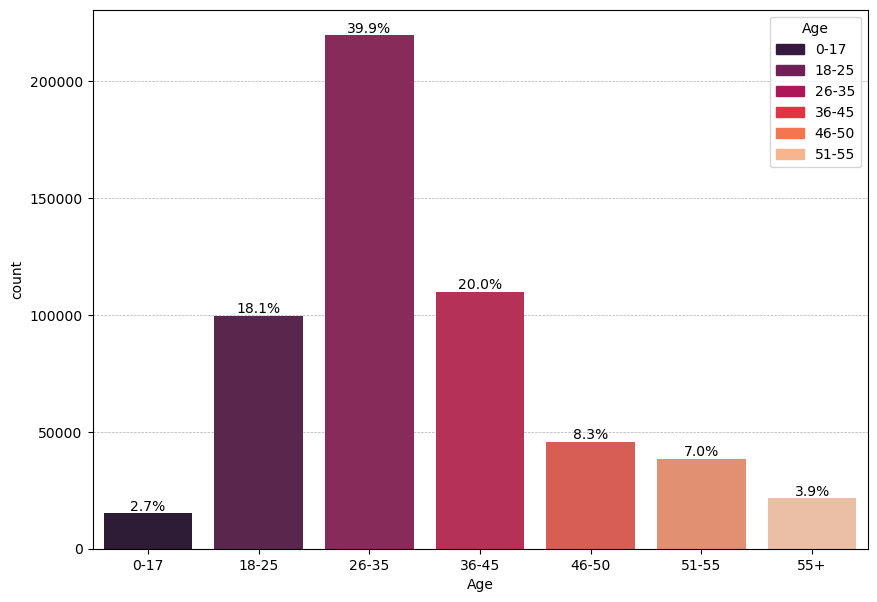

In [22]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)
plt.figure(figsize=(10, 7))
ax =sns.countplot(data=df,x='Age',palette="rocket")
plt.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
total_len = len(df['Age'])
#calculating the percenta
for i in ax.patches:
    percentage = f'{100 * i.get_height() / total_len:0.1f}%'
    x = i.get_x() + i.get_width() / 2  
    y = i.get_height()  
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
handels = [plt.Rectangle((0,0),1,1,color=color) for color in sns.color_palette('rocket')]
ax.legend(handles=handels,labels=age_order,title='Age')

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_77112/2186872860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Product_ID', data=df_top_products, palette='rocket', order=top_10_products)


NameError: name 'mpatches' is not defined

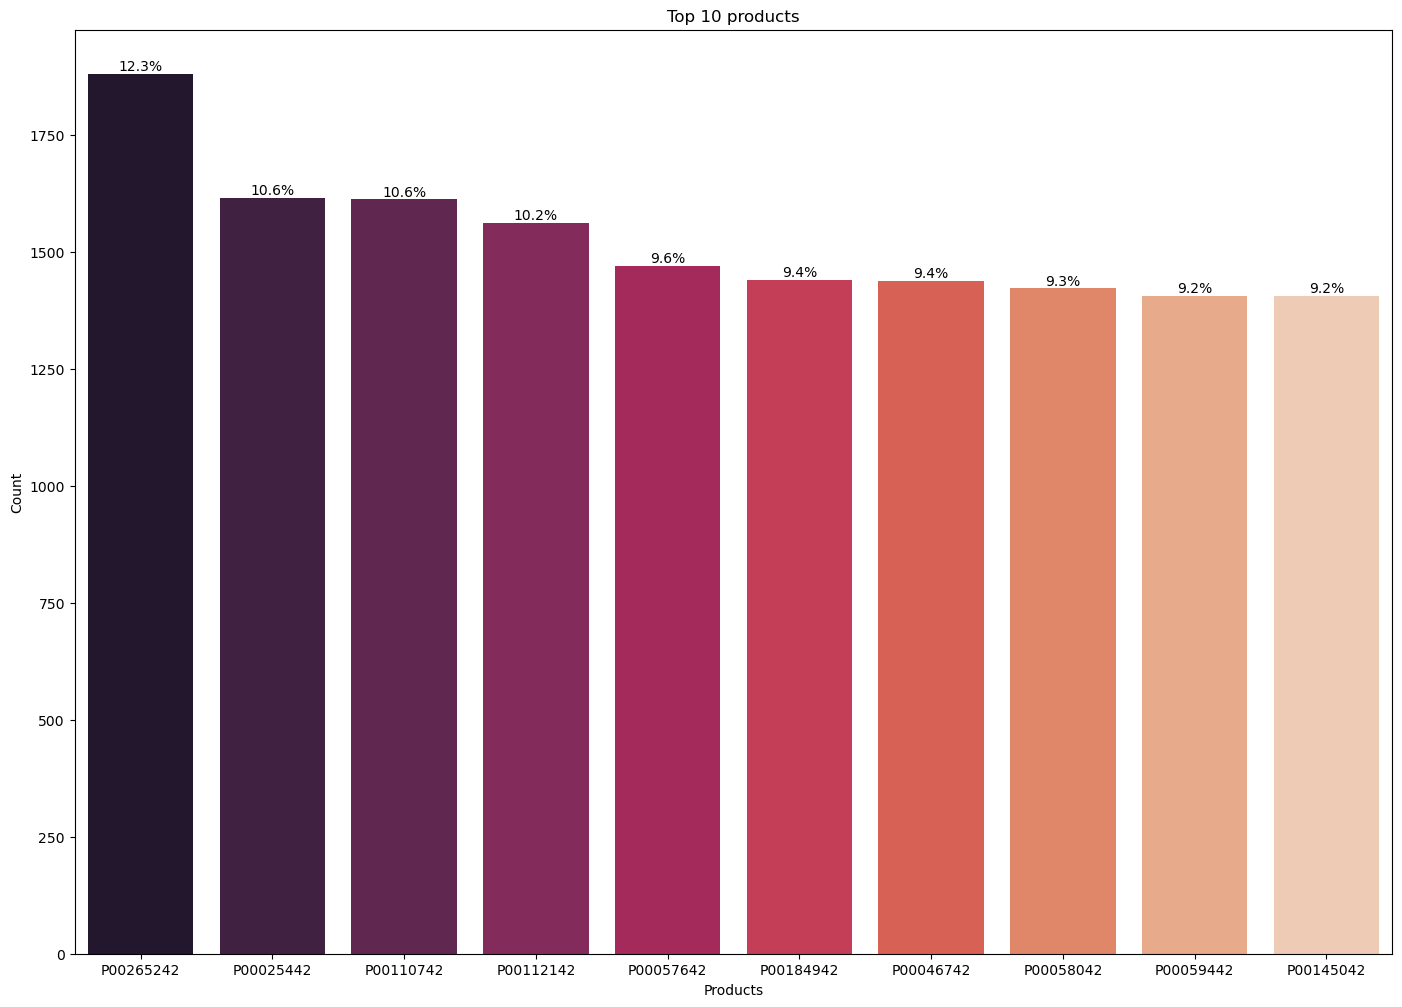

In [23]:
top_10_products = df['Product_ID'].value_counts().head(10).index
df_top_products = df[df['Product_ID'].isin(top_10_products)]
plt.figure(figsize=(17, 12))
ax = sns.countplot(x='Product_ID', data=df_top_products, palette='rocket', order=top_10_products)

total = len(df_top_products)
for p in ax.patches:
    percentage =  f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set_title('Top 10 products')
ax.set_xlabel('Products')
ax.set_ylabel('Count')

colors = [p.get_facecolor() for p in ax.patches]
patches = [mpatches.Patch(color=colors[i], label=product_id) for i, product_id in enumerate(top_10_products)]
ax.legend(handles=patches, title='Top 10 Products')

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_52333/827912368.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df['Purchase'],bins=50,kde=True,palette='icefire')


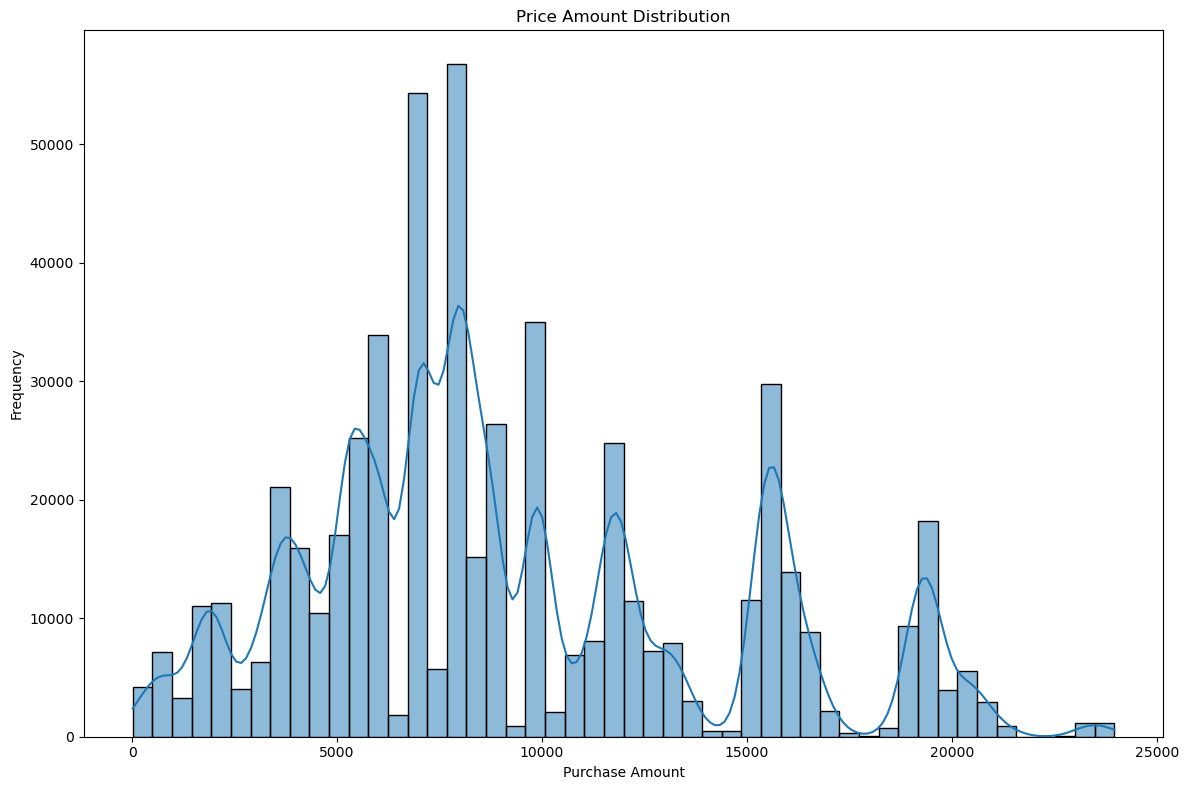

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df['Purchase'],bins=50,kde=True,palette='icefire')
plt.title('Price Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_52333/3169359571.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Gender',y='Average Purchase Amount',data=avg_purchse_cust_df,palette=walmart_palette)


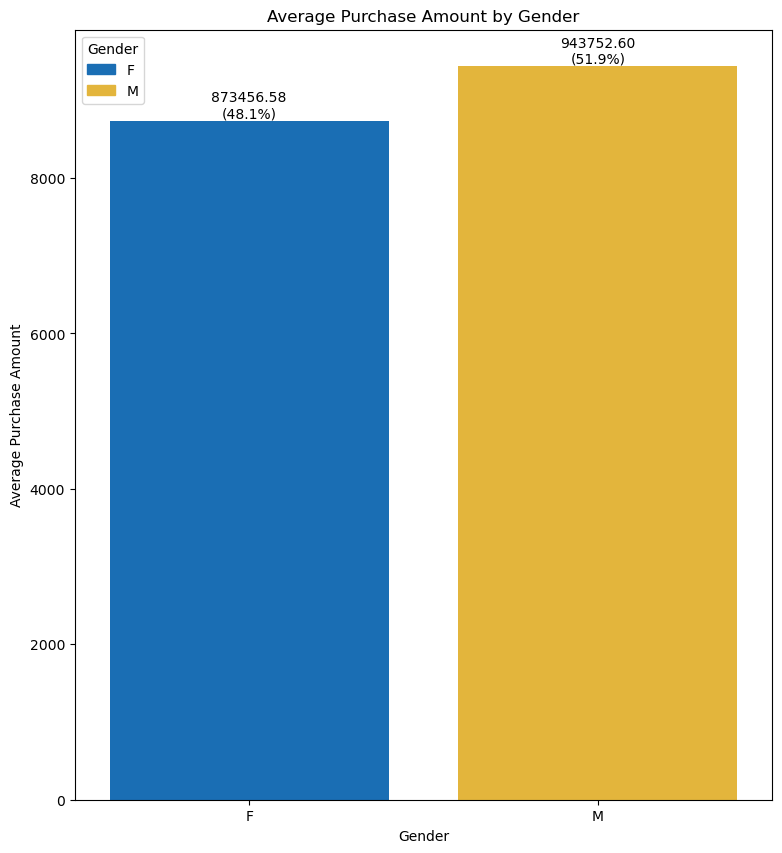

In [ ]:
#average purchase per customer

avg_purchse_cust = df.groupby('Gender')['Purchase'].mean()
avg_purchse_cust_df = avg_purchse_cust.reset_index()
avg_purchse_cust_df.columns = ['Gender','Average Purchase Amount']

total_avg_purchase = avg_purchse_cust_df['Average Purchase Amount'].sum()

avg_purchse_cust_df['Percentage'] = avg_purchse_cust_df['Average Purchase Amount']/ total_avg_purchase *100

plt.figure(figsize=(9,10))
ax = sns.barplot(x='Gender',y='Average Purchase Amount',data=avg_purchse_cust_df,palette=walmart_palette)
ax.set_title('Average Purchase Amount by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Average Purchase Amount')

for p in ax.patches:
    percentage = (f'{100 * p.get_height():.2f}\n({p.get_height()/total_avg_purchase*100:.1f}%)')
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')


colors = [p.get_facecolor() for p in ax.patches]
gender_groups = df.Gender.unique()
patches = [mpatches.Patch(color=colors[i], label=gender) for i, gender in enumerate(gender_groups)]
ax.legend(handles=patches, title='Gender')

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_52333/835615353.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Occupation', y='Average Purchase Amount', data=occupation_purchase_avg_df, palette='rocket')


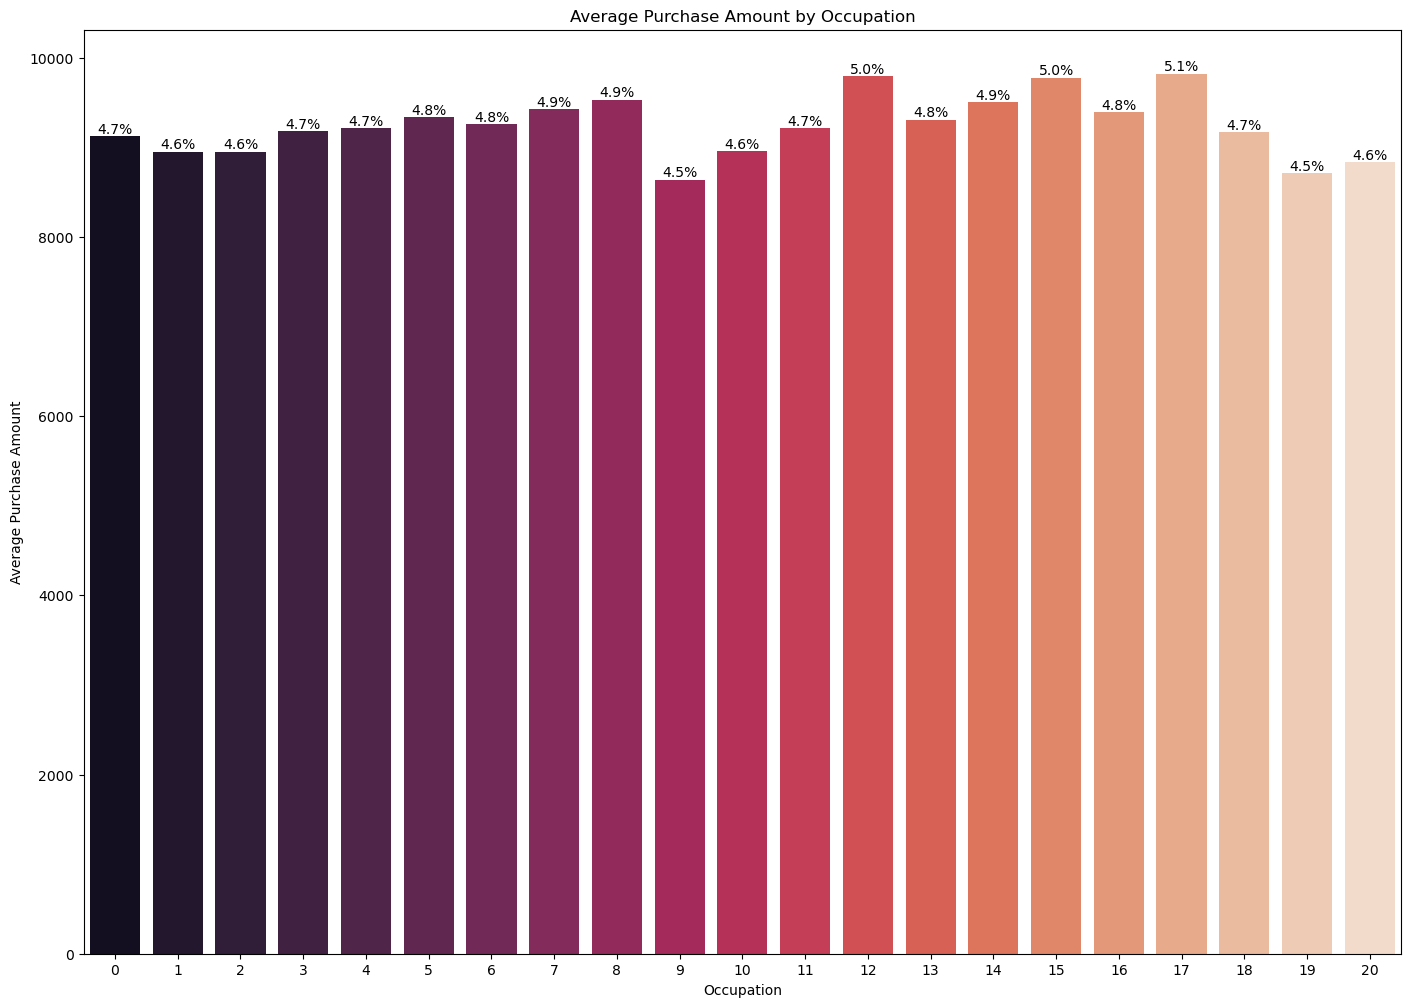

In [ ]:
occupation_purchase_avg = df.groupby('Occupation')['Purchase'].mean()
occupation_purchase_avg_df = occupation_purchase_avg.reset_index()
occupation_purchase_avg_df.columns = ['Occupation', 'Average Purchase Amount']

plt.figure(figsize=(17, 12))
ax = sns.barplot(x='Occupation', y='Average Purchase Amount', data=occupation_purchase_avg_df, palette='rocket')

# Annotate each bar with the percentage
total = occupation_purchase_avg_df['Average Purchase Amount'].sum()
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Set plot title and labels
ax.set_title('Average Purchase Amount by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Average Purchase Amount')

plt.show()

<Axes: title={'center': 'Purchase'}, xlabel='Gender'>

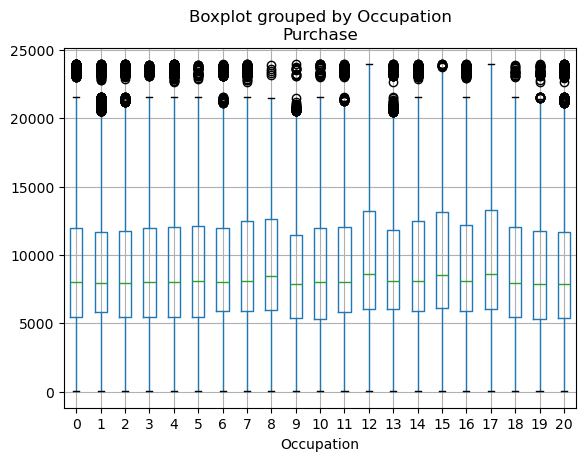

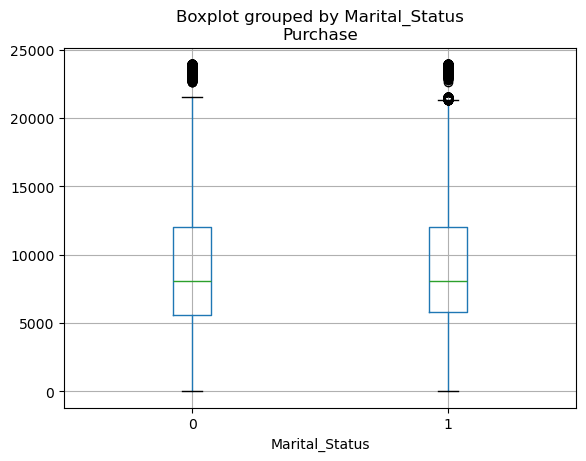

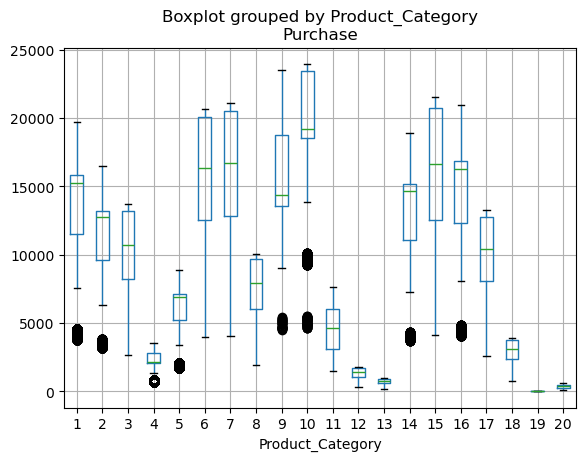

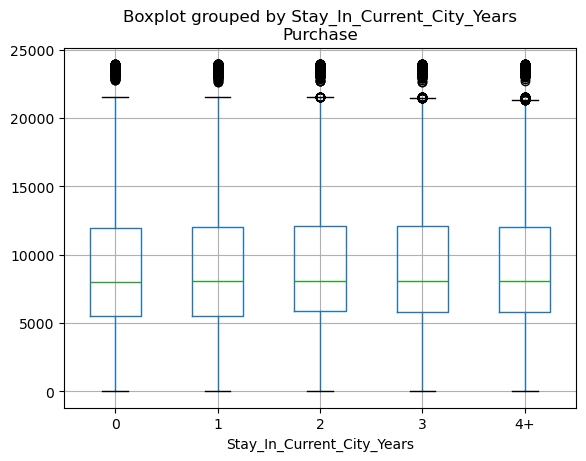

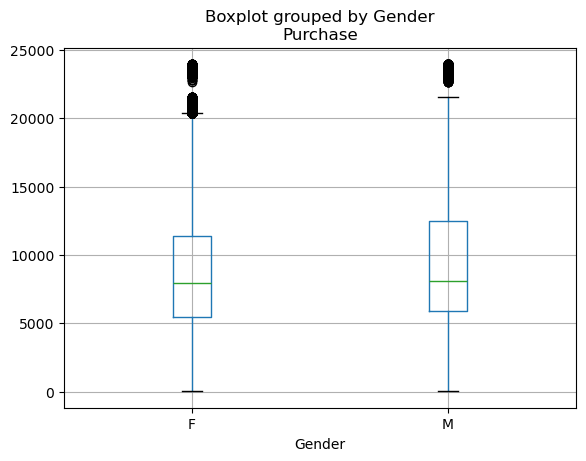

In [ ]:
df.boxplot("Purchase", by = "Occupation")
df.boxplot("Purchase", by = "Marital_Status")
df.boxplot("Purchase", by = "Product_Category")
df.boxplot("Purchase", by = "Stay_In_Current_City_Years")
df.boxplot("Purchase", by = "Gender")

/var/folders/m9/bsn68b253fj362vswsyhbhvm0000gn/T/ipykernel_52333/1589108524.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_product_freq = df.groupby(['Age', 'Product_Category']).size().unstack().fillna(0)


Frequency of Product Purchases by Age Group:
Product_Category     1     2     3     4      5     6     7      8    9   \
Age                                                                        
0-17               3585   805  1200   758   4330   399    53   2258   16   
18-25             26962  4428  4710  2463  28522  3749   481  17911   63   
26-35             58249  8928  7662  4192  61473  8485  1651  44256  154   
36-45             27648  4912  3854  2354  29377  3899   809  23296  107   
46-50             10474  2105  1376   990  11971  1622   327  10656   33   
51-55              9049  1781   924   678   9893  1450   266   9340   29   
55+                4411   905   487   318   5367   862   134   6208    8   

Product_Category    10    11    12    13   14    15    16   17    18   19   20  
Age                                                                             
0-17               111   740   125   112   39   160   229    6    27   59   90  
18-25              603  459

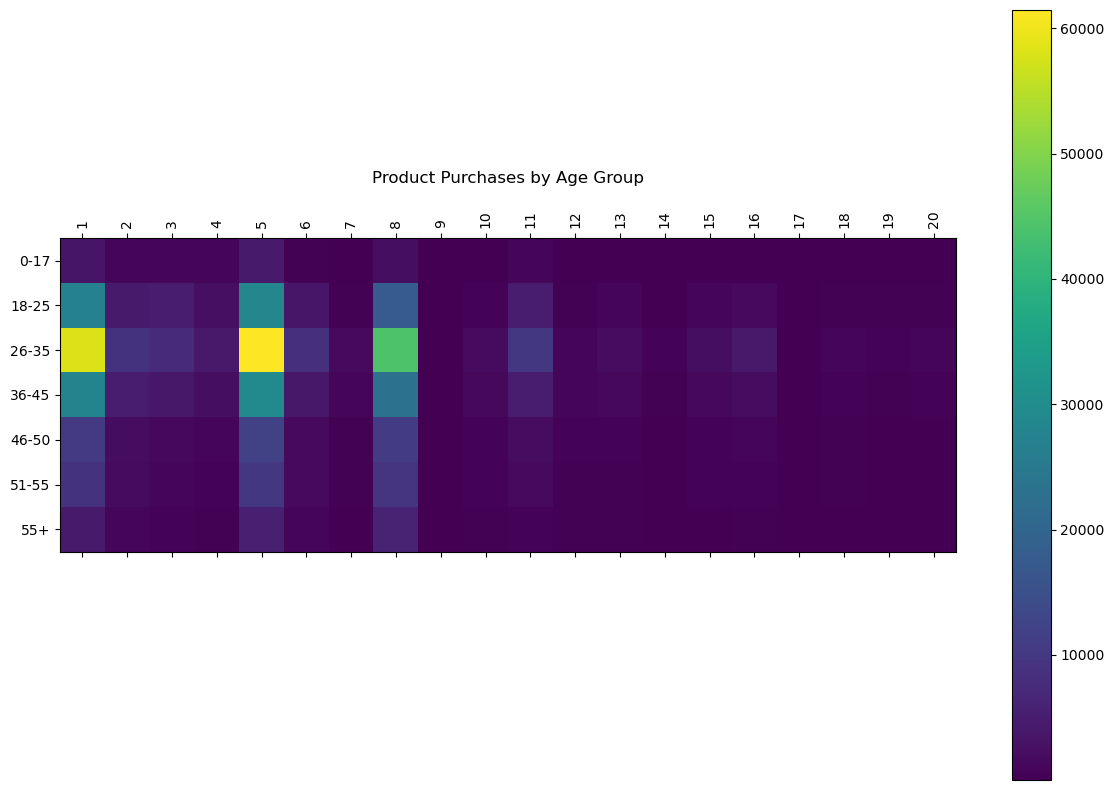

In [ ]:
# Calculate the frequency of product purchases across different age groups
age_product_freq = df.groupby(['Age', 'Product_Category']).size().unstack().fillna(0)

print("Frequency of Product Purchases by Age Group:")
print(age_product_freq)

# Plot heatmap of product purchases by age group
fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(age_product_freq, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(len(age_product_freq.columns)))
ax.set_xticklabels(age_product_freq.columns, rotation=90)
ax.set_yticks(range(len(age_product_freq.index)))
ax.set_yticklabels(age_product_freq.index)
ax.set_title('Product Purchases by Age Group', pad=20)
plt.tight_layout()
plt.show()